# Multilayer Perceptrons
You should build an end-to-end machine learning pipeline using a multilayer perceptron model. In particular, you should do the following:
- Load the `mnist` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Build an end-to-end machine learning pipeline, including a [multilayer perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) model.
- Optimize your pipeline by validating your design decisions.
- Test the best pipeline on the test set and report various [evaluation metrics](https://scikit-learn.org/0.15/modules/model_evaluation.html).  
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

Importing Libraries

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

Reading the Dataset

In [45]:
df = pd.read_csv('https://raw.githubusercontent.com/m-mahdavi/teaching/refs/heads/main/datasets/mnist.csv')

Splitting the Dataset

In [46]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train.shape, df_test.shape

((3200, 786), (800, 786))

EDA

In [47]:
df_train.head()

,id,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
3994,13260,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,10953,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2991,37374,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1221,31597,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
506,69405,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df_train.isnull().sum()

,0
id,0
class,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel780,0
pixel781,0
pixel782,0
pixel783,0


Data Preprocessing

In [49]:
x_train = df_train.drop(['id','class'],axis=1)
y_train = df_train['class']
x_test = df_test.drop(['id','class'],axis=1)
y_test = df_test['class']

In [50]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(3200, 784) (3200,)
(800, 784) (800,)


Feature Engineering

In [51]:
sk = StandardScaler()
x_train = sk.fit_transform(x_train)
x_test = sk.transform(x_test)
x_train.shape, x_test.shape

((3200, 784), (800, 784))

Model Training

In [52]:
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,70,40)],
    'activation': ['tanh', 'relu','identity', 'logistic'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive','invscaling'],
    'max_iter' : [1000,1500,2000],
    'tol' : [0.0001,0.001,0.01],
    'early_stopping': [True,False]
}

rd = RandomizedSearchCV(MLPClassifier(), param_grid, cv=5, n_jobs=-1, verbose=1)
rd.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu',
                                                       'identity', 'logistic'],
                                        'alpha': [0.0001, 0.05],
                                        'early_stopping': [True, False],
                                        'hidden_layer_sizes': [(50, 50, 50),
                                                               (50, 100, 50),
                                                               (100, 70, 40)],
                                        'learning_rate': ['constant',
                                                          'adaptive',
                                                          'invscaling'],
                                        'max_iter': [1000, 1500, 2000],
                                        'solver': ['sgd', 'adam', 'lbfgs'],
                                        'tol': [0.0001, 0.001, 0.01]},
                   verbose=1)

In [53]:
rd.best_params_

{'tol': 0.0001,
 'solver': 'sgd',
 'max_iter': 1500,
 'learning_rate': 'constant',
 'hidden_layer_sizes': (100, 70, 40),
 'early_stopping': False,
 'alpha': 0.0001,
 'activation': 'relu'}

In [54]:
rd.best_score_*100

np.float64(90.75)

Evaluating on the Test Set

In [60]:
best_model = MLPClassifier(
    tol=0.0001,
    solver='sgd',
    max_iter=1500,
    learning_rate='constant',
    hidden_layer_sizes=(100, 70, 40),
    early_stopping=False,
    alpha=0.001,
    activation='relu')

best_model.fit(x_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(100, 70, 40), max_iter=1500,
              solver='sgd')

In [65]:
y_pred = best_model.predict(x_test)

Model Evaluation

In [66]:
accuracy_score(y_test, y_pred)*100

90.625

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        70
           1       0.95      0.96      0.96       100
           2       0.84      0.89      0.87        73
           3       0.92      0.85      0.88        86
           4       0.86      0.94      0.90        80
           5       0.80      0.95      0.87        64
           6       0.94      0.93      0.94        90
           7       0.95      0.91      0.93        67
           8       0.93      0.84      0.88        94
           9       0.88      0.84      0.86        76

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800



<Axes: >

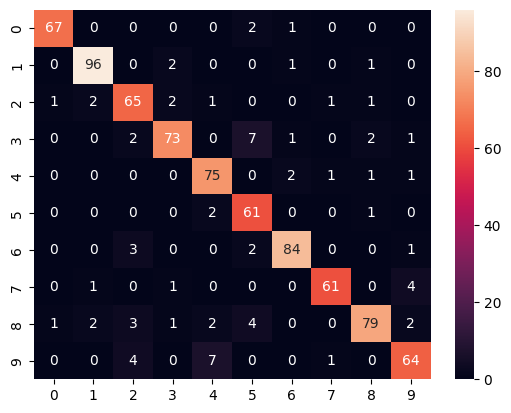

In [68]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)